In [3]:

import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_csv('C:/Users/gokul/Downloads/Telegram Desktop/Entri Elevate/Python/Module End Project/myexcel.csv')


In [ ]:
# DATA PREPROCESSING

In [5]:
print(data.info());

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      458 non-null    object 
 1   Team      458 non-null    object 
 2   Number    458 non-null    int64  
 3   Position  458 non-null    object 
 4   Age       458 non-null    int64  
 5   Height    458 non-null    object 
 6   Weight    458 non-null    int64  
 7   College   374 non-null    object 
 8   Salary    447 non-null    float64
dtypes: float64(1), int64(3), object(5)
memory usage: 32.3+ KB
None


In [7]:
# Display the first 5 rows of the dataset
print(data.head())

            Name            Team  Number Position  Age  Height  Weight  \
0  Avery Bradley  Boston Celtics       0       PG   25  06-Feb     180   
1    Jae Crowder  Boston Celtics      99       SF   25  06-Jun     235   
2   John Holland  Boston Celtics      30       SG   27  06-May     205   
3    R.J. Hunter  Boston Celtics      28       SG   22  06-May     185   
4  Jonas Jerebko  Boston Celtics       8       PF   29  06-Oct     231   

             College     Salary  
0              Texas  7730337.0  
1          Marquette  6796117.0  
2  Boston University        NaN  
3      Georgia State  1148640.0  
4                NaN  5000000.0  


In [11]:
# Wrong data placed under Height Column Hence replaceing values in the column
# Replace 'height' column values with random numbers between 150 and 180
data['Height'] = np.random.randint(150, 181, size=len(data))
print(data.head())

            Name            Team  Number Position  Age  Height  Weight  \
0  Avery Bradley  Boston Celtics       0       PG   25     151     180   
1    Jae Crowder  Boston Celtics      99       SF   25     173     235   
2   John Holland  Boston Celtics      30       SG   27     157     205   
3    R.J. Hunter  Boston Celtics      28       SG   22     157     185   
4  Jonas Jerebko  Boston Celtics       8       PF   29     165     231   

             College     Salary  
0              Texas  7730337.0  
1          Marquette  6796117.0  
2  Boston University        NaN  
3      Georgia State  1148640.0  
4                NaN  5000000.0  


In [9]:
data.drop_duplicates(inplace=True);

In [11]:
data.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      458 non-null    object 
 1   Team      458 non-null    object 
 2   Number    458 non-null    int64  
 3   Position  458 non-null    object 
 4   Age       458 non-null    int64  
 5   Height    458 non-null    object 
 6   Weight    458 non-null    int64  
 7   College   374 non-null    object 
 8   Salary    447 non-null    float64
dtypes: float64(1), int64(3), object(5)
memory usage: 32.3+ KB


In [ ]:
# Removed Dupilicate Values.

In [ ]:
# There are missng values in salary column so filled missing cells with mean value.

In [13]:
data['Salary'] = data['Salary'].fillna(data['Salary'].mean());


In [15]:
data.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      458 non-null    object 
 1   Team      458 non-null    object 
 2   Number    458 non-null    int64  
 3   Position  458 non-null    object 
 4   Age       458 non-null    int64  
 5   Height    458 non-null    object 
 6   Weight    458 non-null    int64  
 7   College   374 non-null    object 
 8   Salary    458 non-null    float64
dtypes: float64(1), int64(3), object(5)
memory usage: 32.3+ KB


In [ ]:
# Since the College column does not contribute to the analysis tasks, I have decided to leave it as is.

In [ ]:
#Analysis

In [17]:
# 1.Calculate the distribution and percentage split
team_distribution = data['Team'].value_counts()
team_percentage = (team_distribution / len(data)) * 100

# Display the results
result = pd.DataFrame({
    'Team Distribution': team_distribution,
    'Team Percentage (%)': team_percentage.round(2)
})

# Display the results
print(result)


                        Team Distribution  Team Percentage (%)
Team                                                          
New Orleans Pelicans                   19                 4.15
Memphis Grizzlies                      18                 3.93
Utah Jazz                              16                 3.49
New York Knicks                        16                 3.49
Milwaukee Bucks                        16                 3.49
Brooklyn Nets                          15                 3.28
Portland Trail Blazers                 15                 3.28
Oklahoma City Thunder                  15                 3.28
Denver Nuggets                         15                 3.28
Washington Wizards                     15                 3.28
Miami Heat                             15                 3.28
Charlotte Hornets                      15                 3.28
Atlanta Hawks                          15                 3.28
San Antonio Spurs                      15              

In [19]:
team_percentage.sum()

100.0

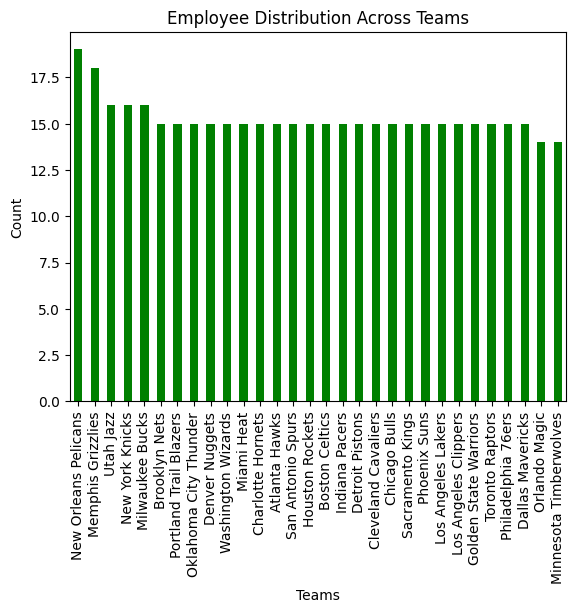

In [25]:
#Team distribution visualization
import matplotlib.pyplot as plt
import seaborn as sns
team_distribution.plot(kind='bar', title='Employee Distribution Across Teams', ylabel='Count', xlabel='Teams', color='green')
plt.show()

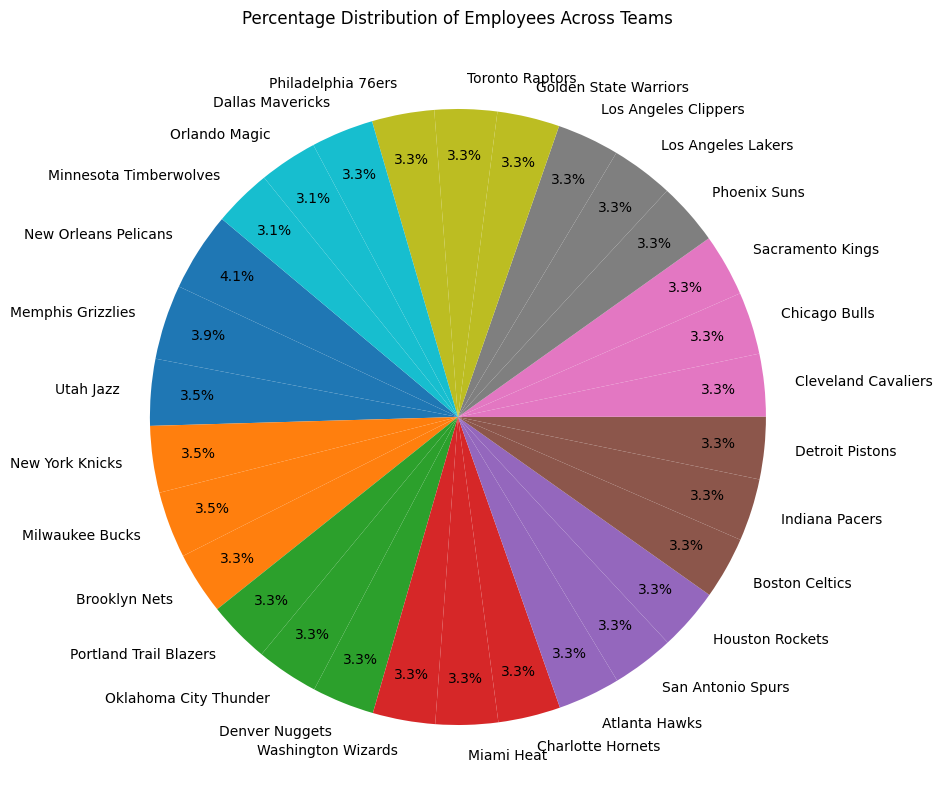

In [27]:
plt.figure(figsize=(10, 10))
team_percentage.plot(kind='pie', autopct='%1.1f%%', startangle=140, colormap='tab10', pctdistance=0.85)
plt.title('Percentage Distribution of Employees Across Teams')
plt.ylabel('') 
plt.show()

In [29]:
#2.Segregate employees based on their positions within the company.

position_distribution = data['Position'].value_counts()
print(position_distribution)

Position
SG    102
PF    100
PG     92
SF     85
C      79
Name: count, dtype: int64


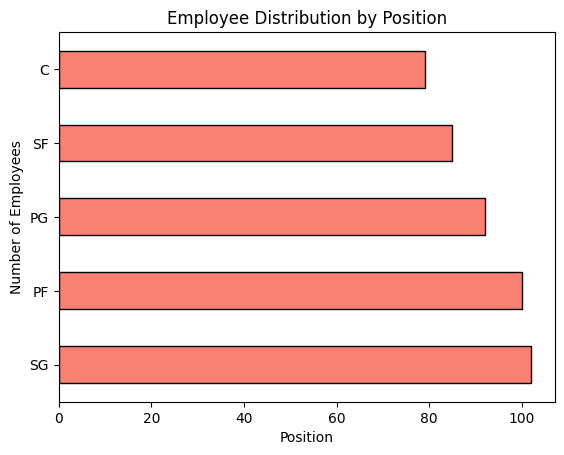

In [31]:
position_distribution.plot(kind='barh', color='Salmon', edgecolor='black')

# Add titles and labels
plt.title('Employee Distribution by Position')
plt.xlabel('Position')
plt.ylabel('Number of Employees')

plt.show()

In [33]:
#3.Predominant age group among employees.

bins = [18, 25, 35, 45]
labels = ['18-25', '26-35', '36-45']

# Create a new column for age groups
data['age_group'] = pd.cut(data['Age'], bins=bins, labels=labels)

# Count occurrences of each age group
age_group_count = data['age_group'].value_counts()
print("Distribution of employees by age group:")
print(age_group_count)

# Find the predominant age group
predominant_age_group = age_group_count.idxmax()
print(f"The predominant age group is: {predominant_age_group}")


Distribution of employees by age group:
age_group
26-35    235
18-25    200
36-45     23
Name: count, dtype: int64
The predominant age group is: 26-35


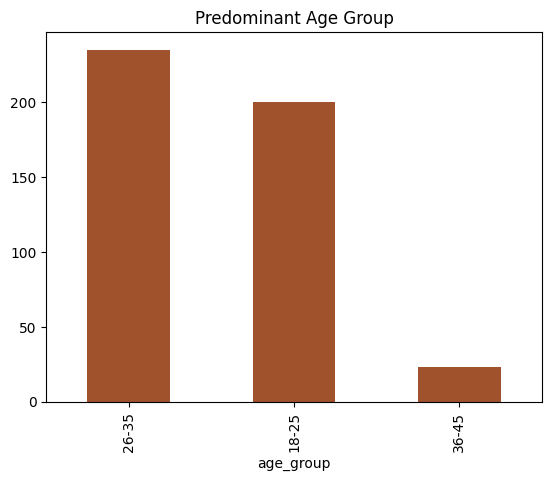

In [35]:
age_group_count.plot(kind='bar', title='Predominant Age Group', color='Sienna')
plt.ylabel('')
plt.show()

In [37]:
#4.Team and position with the highest salary expenditure

salary_by_team = data.groupby('Team')['Salary'].sum()
salary_by_position = data.groupby('Position')['Salary'].sum()
print(salary_by_team)

Team
Atlanta Hawks             7.290295e+07
Boston Celtics            6.337504e+07
Brooklyn Nets             5.252848e+07
Charlotte Hornets         7.834092e+07
Chicago Bulls             8.678338e+07
Cleveland Cavaliers       1.118227e+08
Dallas Mavericks          7.119873e+07
Denver Nuggets            6.495590e+07
Detroit Pistons           6.716826e+07
Golden State Warriors     8.886900e+07
Houston Rockets           7.528302e+07
Indiana Pacers            6.675183e+07
Los Angeles Clippers      9.485464e+07
Los Angeles Lakers        7.177043e+07
Memphis Grizzlies         9.588676e+07
Miami Heat                9.218361e+07
Milwaukee Bucks           6.960352e+07
Minnesota Timberwolves    6.454367e+07
New Orleans Pelicans      8.275077e+07
New York Knicks           7.330390e+07
Oklahoma City Thunder     9.376530e+07
Orlando Magic             6.016147e+07
Philadelphia 76ers        3.582686e+07
Phoenix Suns              6.344514e+07
Portland Trail Blazers    4.830182e+07
Sacramento Kings    

In [39]:
print(salary_by_position)

Position
C     4.663773e+08
PF    4.570628e+08
PG    4.661848e+08
SF    4.128549e+08
SG    4.114782e+08
Name: Salary, dtype: float64


In [41]:
highest_salary_team = salary_by_team.idxmax()
highest_salary_position = salary_by_position.idxmax()
print(f"\nHighest Salary Team: {highest_salary_team} with {salary_by_team.max()} salary")
print(f"\nHighest Salary position: {highest_salary_position} with {salary_by_position.max()} salary")


Highest Salary Team: Cleveland Cavaliers with 111822658.5458613 salary

Highest Salary position: C with 466377332.0 salary


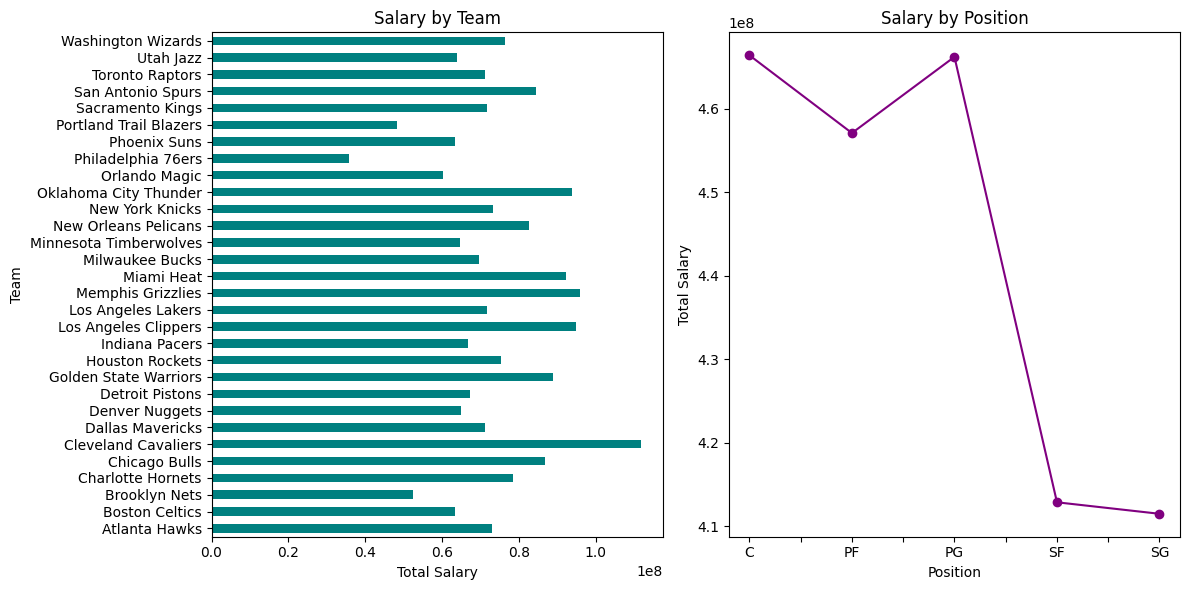

In [43]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

salary_by_team.plot(kind='barh', color='teal', ax=ax[0], title='Salary by Team')
ax[0].set_xlabel('Total Salary')
ax[0].set_ylabel('Team')
salary_by_position.plot(kind='line', marker='o', color='purple', ax=ax[1], title='Salary by Position')
ax[1].set_ylabel('Total Salary')
ax[1].set_xlabel('Position')

plt.tight_layout()
plt.show()

Correlation between Age and Salary: 0.211


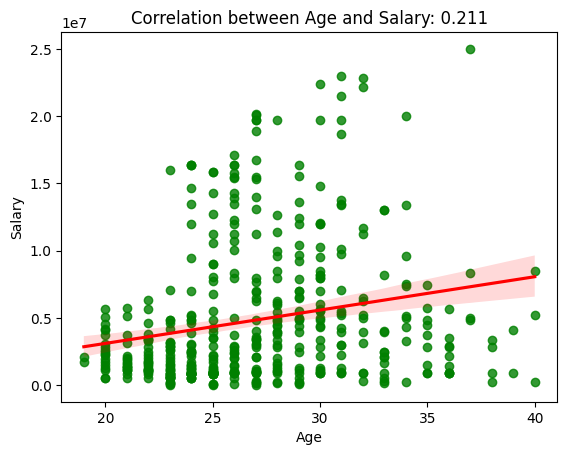

In [149]:
#5. Correlation between age and salary

correlation = data['Age'].corr(data['Salary'])
print(f"Correlation between Age and Salary: {correlation:.3f}")

# Visualize the correlation

sns.regplot(x='Age', y='Salary', data=data, scatter_kws={'color': 'green'}, line_kws={'color': 'red'})
plt.title(f'Correlation between Age and Salary: {correlation:.3f}')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()



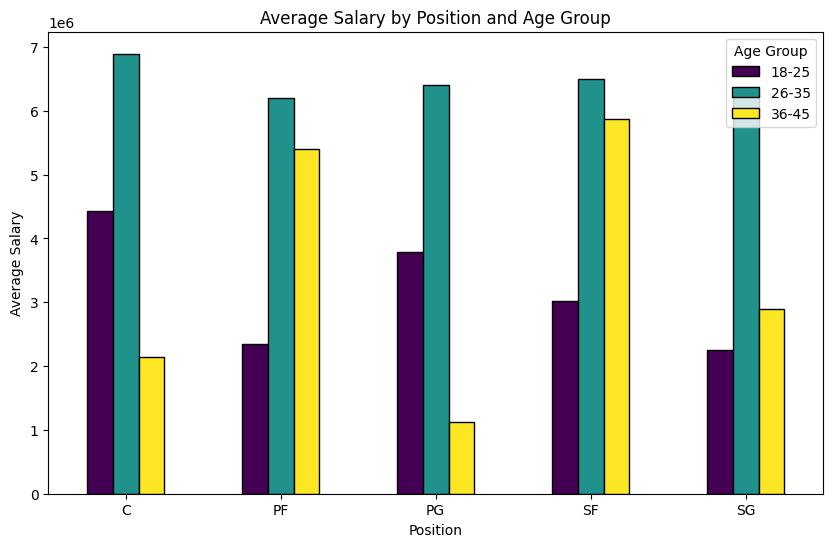

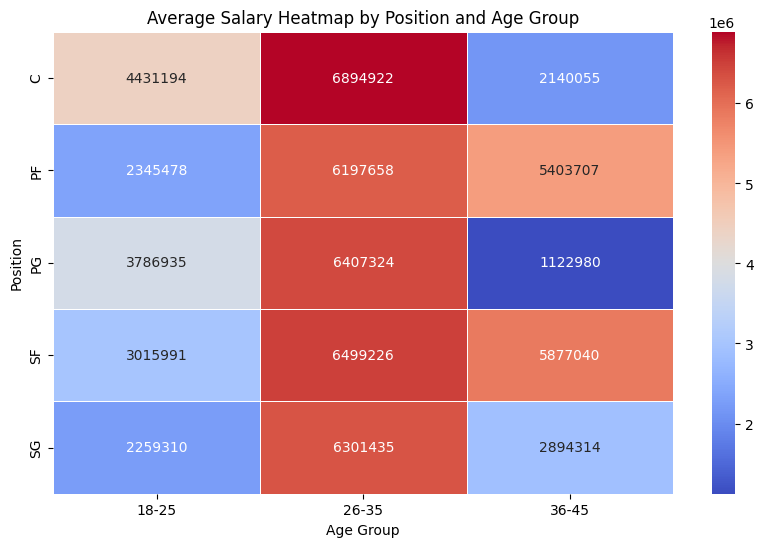

In [51]:
#Age, Position, Salary Realtion to find performance indicator.

# Group by position and age group, calculate average salary
avg_salary_by_position_age = data.groupby(['Position', 'age_group'], observed=True)['Salary'].mean().unstack()

# Display the grouped bar chart
avg_salary_by_position_age.plot(kind='bar', figsize=(10, 6), colormap='viridis', edgecolor='black')
plt.title('Average Salary by Position and Age Group')
plt.xlabel('Position')
plt.ylabel('Average Salary')
plt.legend(title='Age Group')
plt.xticks(rotation=0)
plt.show()

# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(avg_salary_by_position_age, annot=True, fmt=".0f", cmap='coolwarm', linewidths=0.5)
plt.title('Average Salary Heatmap by Position and Age Group')
plt.xlabel('Age Group')
plt.ylabel('Position')
plt.show()


In [ ]:
#This analysis underscores the strategic importance of younger players (18-25) in high-impact roles and experienced players (26-35) in physically demanding positions. 
#Salaries align with positional demands and performance, with key roles like Point Guards and Centers receiving higher rewards. These insights can guide better strategies for talent acquisition, role prioritization, and salary planning.
